### Assignment 5 - Counterfeit Money Detector
### By Morgan Kaiser

Counterfeit money is a problem businesses need to guard against on an ongoing basis. If a business accepts a fake bill in payment for merchandise or services, they lose both the face value of the bill they received, plus any good or services they provided to the customer who paid with the counterfeit bill.

Nowadays, it is too hard to spot counterfeit and genuine bills. You were asked to create a NN model to help organizations to accurately classify counterfeit bills.

Data given to you were extracted from images that were taken from genuine and counterfeit bills. A digital image of each bill was taken using an industrial camera, then a wavelet transform tool was used to extract features from these images.

Feature Information:

1. id: id of the image
2. variance: variance of Wavelet Transformed image 
2. skewness: skewness of Wavelet Transformed image 
3. curtosis: curtosis of Wavelet Transformed image 
4. entropy: entropy of image
5. class: whether bill is counterfeit or not (1-counterfeit, 0 - genuine)

Please answer the following questions: 
- How many layers are there in your model? How did you decide how many layers to add?
- How many neurons are in each of the layers? Why/how did you decide how many neurons to add?
- How is the performance of your model? Please interpret your confusion matrix.

Note: For any missing values, substitute 0.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('bill_authentication.csv')
df.head()

,id,variance,skewness,kurtosis,entropy,class
0,1,3.62160,8.6661,-2.8073,-0.44699,0
1,2,4.54590,8.1674,-2.4586,-1.46210,0
2,3,3.86600,-2.6383,1.9242,0.10645,0
3,4,3.45660,9.5228,-4.0112,-3.59440,0
4,5,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 6 columns):
id          1372 non-null int64
variance    1372 non-null float64
skewness    1342 non-null float64
kurtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(2)
memory usage: 64.4 KB


> Skewness is missing 30 values. let's take a closer look.

In [8]:
# finding rows with null values
df[df.isna().any(axis=1)]

,id,variance,skewness,kurtosis,entropy,class
170,171,0.57060,NaN,1.242100,-0.562100,0
192,193,1.45780,NaN,4.178500,0.591360,0
226,227,0.57060,NaN,1.242100,-0.562100,0
232,233,2.25960,NaN,4.735500,-0.277600,0
272,273,4.40720,NaN,2.041600,1.131900,0
293,294,1.93400,NaN,4.816000,-0.339670,0
374,375,-1.50550,NaN,6.868100,-0.506480,0
380,381,1.50990,NaN,6.233200,-0.303460,0
498,499,0.57060,NaN,1.242100,-0.562100,0
538,539,0.72252,NaN,5.670300,-1.350900,0


In [10]:
# alright, doesn't matter for this though. replace all NaN vals with zero.

df['skewness'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 6 columns):
id          1372 non-null int64
variance    1372 non-null float64
skewness    1372 non-null float64
kurtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(2)
memory usage: 64.4 KB


In [11]:
df.describe()

,id,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,686.500000,0.433735,1.922896,1.397627,-1.191657,0.444606
std,396.206596,2.842763,5.868862,4.310030,2.101013,0.497103
min,1.000000,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,343.750000,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,686.500000,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,1029.250000,2.821475,6.814625,3.179250,0.394810,1.000000
max,1372.000000,6.824800,12.951600,17.927400,2.449500,1.000000


> values don't swing too widely

> close in scale, but will still scale due to using NN model

> class is a binary attribute (1=counterfeit, 0=genuine) but mean = 0.44. As this number is below 0.5, this means there are more genuine bills in this dataset than counterfeit bills.

# EDA

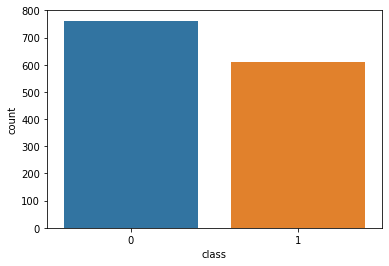

In [12]:
# let's verify our interpretation of the class variable
sns.countplot(x="class", data=df)

We have 0 categorical variables -> no need to get dummies.

# Split Train and Test Sets

In [27]:
df.drop('id', axis=1, inplace=True)

In [28]:
X = df.drop('class', axis=1)
y = df['class']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=0)

# Scale Data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Use Keras to build NN model

In [33]:
from keras.models import Sequential
from keras.layers import Dense

In [34]:
# create the NN object, since we are doing classification, I called it classifier -> from Dr. Ozturk's NN with Python file
classifier = Sequential()

In [36]:
# Input layer and first hidden layer
classifier.add(Dense(input_dim=4, units=3, activation="relu"))

where...

- input_dim: number of neurons in input layer
  - should be equal to how many independent variables (IVs aka inputs) there are
  
- units: number of neurons in hidden layer
  - rule of thumb is to add input layer and output layer together and take average
  
- activation: relu is most common and widely accepted

In [37]:
# Output layer
classifier.add(Dense(units=1, activation="sigmoid"))

> Output layer should be equal to what we are predicting. Since we are doing classification, we want 1 answer (the bill is counterfeit OR the bill is genuine). So number of neurons is only 1 here.

In [38]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [39]:
classifier.fit(X_train,y_train, epochs=20, batch_size=10)


Epoch 1/20
1097/1097 [==============================] - 0s 392us/step - loss: 0.8477 - acc: 0.3573
Epoch 2/20
1097/1097 [==============================] - 0s 127us/step - loss: 0.7240 - acc: 0.5178
Epoch 3/20
1097/1097 [==============================] - 0s 123us/step - loss: 0.6165 - acc: 0.7074
Epoch 4/20
1097/1097 [==============================] - 0s 138us/step - loss: 0.5236 - acc: 0.8067
Epoch 5/20
1097/1097 [==============================] - 0s 135us/step - loss: 0.4467 - acc: 0.8587
Epoch 6/20
1097/1097 [==============================] - 0s 130us/step - loss: 0.3852 - acc: 0.8751
Epoch 7/20
1097/1097 [==============================] - 0s 132us/step - loss: 0.3354 - acc: 0.9006
Epoch 8/20
1097/1097 [==============================] - 0s 127us/step - loss: 0.2951 - acc: 0.9143
Epoch 9/20
1097/1097 [==============================] - 0s 134us/step - loss: 0.2614 - acc: 0.9262
Epoch 10/20
1097/1097 [==============================] - 0s 124us/step - loss: 0.2332 - acc: 0.9353
Epoch 11

# Model Predictions

In [43]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [44]:
y_pred

array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [

# Model Evaluation

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[152,   5],
       [  0, 118]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       157
           1       0.96      1.00      0.98       118

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



# Questions

**1. How many layers are there in your model? How did you decide how many layers to add?**
  - 3 layers: 1 input, 1 hidden, 1 output.

  - There is no support showing it is necessary to build more than 2 hidden layers.
    - As our data isn't overly complex and dataset is rather tiny, I opted for 1 hidden layer.

**2. How many neurons are in each of the layers? Why/how did you decide how many neurons to add?**
  - input
    - 4 neurons because there are 4 IVs.

  - hidden
    - 3 neurons because I added the input layer and output layer together then took around 2/3 of the value.
    - 4+1=5 then 5*(2/3) is a little above 3.

  - output
    - 1 neuron because it is a classification problem and I want 1 answer.
    - Either the bill is genuine, or the bill is counterfeit.

**3. How is the performance of your model? Please interpret your confusion matrix.**
  - Model has 98% accuracy
  - True Positives: 152 genuine bills
  - False Negatives: 5 genuine bills were incorrectly classified as counterfeit
  - True Negatives: 118 counterfeit bills
  - False Positives: 0 counterfeit bills were incorrectly classified as genuine